In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

# Downloading Dataset

In [1]:
import nltk
tagged_sentences = nltk.corpus.treebank.tagged_sents()

In [2]:
print(tagged_sentences[3])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))

[('A', 'DT'), ('form', 'NN'), ('of', 'IN'), ('asbestos', 'NN'), ('once', 'RB'), ('used', 'VBN'), ('*', '-NONE-'), ('*', '-NONE-'), ('to', 'TO'), ('make', 'VB'), ('Kent', 'NNP'), ('cigarette', 'NN'), ('filters', 'NNS'), ('has', 'VBZ'), ('caused', 'VBN'), ('a', 'DT'), ('high', 'JJ'), ('percentage', 'NN'), ('of', 'IN'), ('cancer', 'NN'), ('deaths', 'NNS'), ('among', 'IN'), ('a', 'DT'), ('group', 'NN'), ('of', 'IN'), ('workers', 'NNS'), ('exposed', 'VBN'), ('*', '-NONE-'), ('to', 'TO'), ('it', 'PRP'), ('more', 'RBR'), ('than', 'IN'), ('30', 'CD'), ('years', 'NNS'), ('ago', 'IN'), (',', ','), ('researchers', 'NNS'), ('reported', 'VBD'), ('0', '-NONE-'), ('*T*-1', '-NONE-'), ('.', '.')]
Tagged sentences:  3914
Tagged words: 100676


In [3]:
import numpy as np
sentences, sentence_tags =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))

In [4]:
print(sentences[30])
print(sentence_tags[30])

['``' 'There' "'s" 'no' 'question' 'that' 'some' 'of' 'those' 'workers'
 'and' 'managers' 'contracted' 'asbestos-related' 'diseases' ',' "''"
 'said' '*T*-1' 'Darrell' 'Phillips' ',' 'vice' 'president' 'of' 'human'
 'resources' 'for' 'Hollingsworth' '&' 'Vose' '.']
['``' 'EX' 'VBZ' 'DT' 'NN' 'IN' 'DT' 'IN' 'DT' 'NNS' 'CC' 'NNS' 'VBD' 'JJ'
 'NNS' ',' "''" 'VBD' '-NONE-' 'NNP' 'NNP' ',' 'NN' 'NN' 'IN' 'JJ' 'NNS'
 'IN' 'NNP' 'CC' 'NNP' '.']


# Configuring Model

In [5]:
from sklearn.model_selection import train_test_split
(train_sentences,  test_sentences, train_tags, test_tags) = train_test_split(sentences, sentence_tags, test_size=0.2)

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer

st = PorterStemmer()
words, tags = set([]), set([])

for s in train_sentences:    
    for w in s:
        words.add(w.lower())

for ts in train_tags:
    for t in ts:
        tags.add(t)

In [7]:
word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0
word2index['-OOV-'] = 1
 
tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0

In [8]:
train_sentences_X, test_sentences_X, train_tags_y, test_tags_y = [], [], [], []
 
for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

In [9]:
for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

In [10]:
for s in train_tags:
    train_tags_y.append([tag2index[t] for t in s])

for s in test_tags:
    test_tags_y.append([tag2index[t] for t in s])

In [11]:
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[5135, 1280, 7818, 7936, 8866, 2312, 3829, 3364, 7818, 2259, 486, 8320, 6833, 8866, 2312, 7424, 9435, 2270, 1786, 1561, 5990, 7427, 159]
[6833, 5447, 4860, 7137, 4375, 4643, 4760, 7137, 5181, 7993, 6351, 3284, 1, 7137, 8465, 159]
[46, 46, 40, 5, 14, 35, 46, 10, 40, 31, 42, 12, 25, 14, 35, 25, 14, 20, 14, 7, 20, 14, 28]
[25, 14, 35, 25, 14, 31, 12, 25, 14, 17, 20, 24, 5, 25, 14, 28]


In [12]:
MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH)

271


In [13]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')

In [14]:
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[5135 1280 7818 7936 8866 2312 3829 3364 7818 2259  486 8320 6833 8866
 2312 7424 9435 2270 1786 1561 5990 7427  159    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 271, 128)          1297536   
_________________________________________________________________
bidirectional (Bidirectional (None, 271, 512)          788480    
_________________________________________________________________
time_distributed (TimeDistri (None, 271, 47)           24111     
_________________________________________________________________
activation (Activation)      (None, 271, 47)           0         
Total params: 2,110,127
Trainable params: 2,110,127
Non-trainable params: 0
_________________________________________________________________


In [16]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [17]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [18]:
history = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)), batch_size=128, epochs=40, validation_split=0.2)

Epoch 1/40
20/20 [==============================] - 155s 8s/step - loss: 1.1935 - accuracy: 0.8585 - val_loss: 0.3678 - val_accuracy: 0.9096
Epoch 2/40
20/20 [==============================] - 227s 11s/step - loss: 0.3359 - accuracy: 0.9057 - val_loss: 0.3167 - val_accuracy: 0.9057
Epoch 3/40
20/20 [==============================] - 234s 12s/step - loss: 0.3143 - accuracy: 0.9113 - val_loss: 0.3042 - val_accuracy: 0.9175
Epoch 4/40
20/20 [==============================] - 238s 12s/step - loss: 0.3035 - accuracy: 0.9166 - val_loss: 0.2960 - val_accuracy: 0.9179
Epoch 5/40
20/20 [==============================] - 241s 12s/step - loss: 0.2958 - accuracy: 0.9168 - val_loss: 0.2902 - val_accuracy: 0.9180
Epoch 6/40
20/20 [==============================] - 247s 12s/step - loss: 0.2892 - accuracy: 0.9169 - val_loss: 0.2813 - val_accuracy: 0.9181
Epoch 7/40
20/20 [==============================] - 250s 12s/step - loss: 0.2817 - accuracy: 0.9184 - val_loss: 0.2751 - val_accuracy: 0.9215
Epoch 8

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


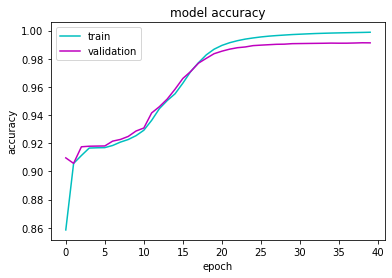

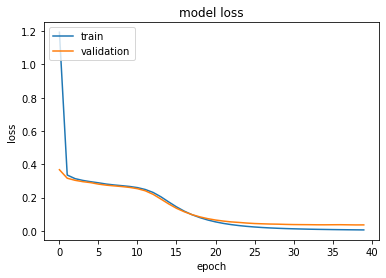

In [19]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.axes().set(facecolor ="white")
plt.plot(history.history['accuracy'],color='c')
plt.plot(history.history['val_accuracy'],color='m')
plt.title('model accuracy').set_color('black')
plt.ylabel('accuracy').set_color('black')
plt.xlabel('epoch').set_color('black')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

plt.axes().set(facecolor ="white")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.title('model loss').set_color('black')
plt.ylabel('loss').set_color('black')
plt.xlabel('epoch').set_color('black')
plt.show()

In [20]:
predictions = model.predict(test_sentences_X)

In [21]:
scores = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")
print(model.metrics_names)

25/25 [==============================] - 17s 670ms/step - loss: 0.0355 - accuracy: 0.9913
accuracy: 99.13380742073059
['loss', 'accuracy']


In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
input_text = "Will he cheat hari in the park? I shall call the police here. The culprit has been caught! He must surrender."
test_samples = sent_tokenize(input_text)

In [23]:
test_samples = [word_tokenize(x) for x in test_samples]

In [24]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)
 
test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[8159  591    1 ...    0    0    0]
 [ 964 2916 9218 ...    0    0    0]
 [7137 3469 2298 ...    0    0    0]
 [ 591 6517    1 ...    0    0    0]]


In [25]:
predictions = model.predict(test_samples_X)
#print(predictions, predictions.shape)

In [26]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            if index[np.argmax(categorical)] == '-PAD-':
                break
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

In [27]:
print(logits_to_tokens(predictions, {i: t for t, i in tag2index.items()}))

[['MD', 'PRP', 'VBG', 'NN', 'IN', 'DT', 'NN', '.'], ['PRP', 'MD', 'VB', 'DT', 'NN', 'RB', '.'], ['DT', 'NN', 'VBZ', 'VBN', 'VBN', '.'], ['PRP', 'MD', 'VBG', '.']]


In [28]:
"Will he cheat hari in the park? I shall call the police here. The culprit has been caught! He must surrender."

'Will he cheat hari in the park? I shall call the police here. The culprit has been caught! He must surrender.'